<a href="https://colab.research.google.com/github/ARCHITHAOJHA/AIML_2303A52170-Architha/blob/main/2303A52170_LABEXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARCHITHA OJHA

2303A52170

BATCH 41

AIML LAB EXTERNAL (2024 – 25)

SET – 2 (Logistic Regression)

1. Implement logistic regression on a binary classification dataset.
2. Calculate and interpret the confusion matrix.
3. Evaluate the model using accuracy and F1-score.
4. Visualize the decision boundary of the logistic regression model.
5. Implement regularization (L1 or L2) and evaluate the model performance.

Dataset Head:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_wor

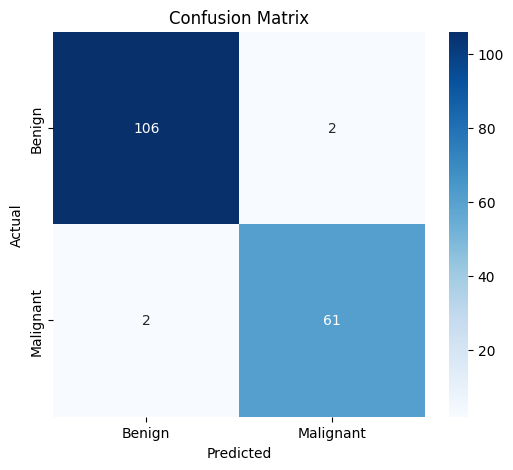

Accuracy: 0.98
F1 Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy with L2 regularization: 0.98
F1 Score with L2 regularization: 0.97


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import seaborn as sns

# 1. Load the dataset
# Replace with the correct path to your CSV file
df = pd.read_csv('/content/data.csv')

# Inspect the dataset
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# 2. Preprocessing
# Drop the 'id' column and 'Unnamed: 32' column (if it exists)
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')

# Convert 'diagnosis' to binary: M (malignant) -> 1, B (benign) -> 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop(columns=['diagnosis']).values  # Features
y = df['diagnosis'].values                 # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)  # Increase iterations for convergence
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Regularization (L2) with Logistic Regression
model_l2 = LogisticRegression(penalty='l2', C=1.0, max_iter=10000)  # L2 regularization
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)

# Evaluate with L2 regularization
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)
print(f"Accuracy with L2 regularization: {accuracy_l2:.2f}")
print(f"F1 Score with L2 regularization: {f1_l2:.2f}")


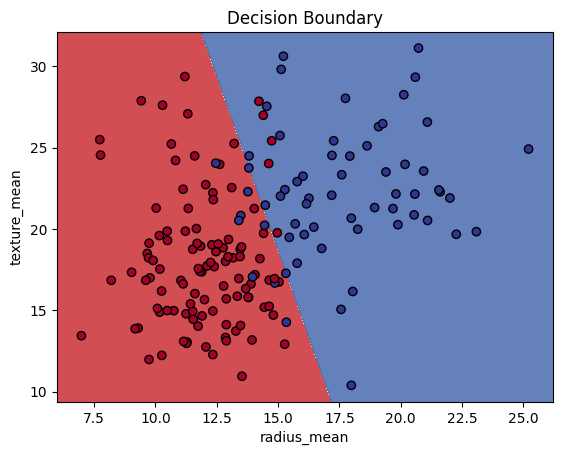

Accuracy: 0.91
F1 Score: 0.87


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# 1. Load the dataset
df = pd.read_csv('/content/data.csv')

# Preprocess: Drop irrelevant columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')

# Convert 'diagnosis' to binary: M -> 1, B -> 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select two features for visualization
selected_features = ['radius_mean', 'texture_mean']  # Replace with any two features
X = df[selected_features].values
y = df['diagnosis'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Plotting the decision boundary
def plot_decision_boundary(X, y, model, feature_names):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title("Decision Boundary")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

# Call the plotting function
plot_decision_boundary(X_test, y_test, model, selected_features)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
